# Markov Chain Basics

Just learned about Markov chains; I want to prove to myself that I know basically what I'm doing by re-creating a problem:

* King needs to visit 10 islands in conjunction with their population size
* Islands are numbered 1 -> 10 and each is numbered in proportion to its population size
* For each step (of 200,000), must:
    * Randomly propose going either up (10 -> 1) or down (1 -> 10)
    * Calculate the probability of moving as p_p/p_c (proposed over current)
    * Take a random uniform with the given probability to determine whether or not we move

In [1]:
# Import numpy and plotting
import numpy as np
import matplotlib.pyplot as plt


In [10]:
# Sampling test
total = 0
for i in range(100):
    total += np.random.choice([0,1], p = [0.3,0.7])
print(total)

74


Here's my function for doing it:

In [33]:
# Initialize number of runs to do and an island (I'll start with 5, but it shouldn't matter)
numVisits = 10000; visitArray = [0] * numVisits;
currentIsland = 10

# Run through the loop
for i in range(numVisits):
    
    # Flip a coin to determine direction
    proposedDirection = np.random.choice([-1,1])

    # Catch the wrap-around cases to output final number for proposed Island
    if (proposedDirection + currentIsland) == 11:
        proposedIsland = 1
    elif (proposedDirection + currentIsland) == 0:
        proposedIsland = 10
    else:
        proposedIsland = proposedDirection + currentIsland

    # Calculate the probability of actually moving
    pMove = min(proposedIsland/currentIsland,1)
    

    # Determine whether to actually go
    toGo = np.random.choice([0,1], p = [1-pMove, pMove])
    if toGo:
        currentIsland = proposedIsland
    
    # Add to the array and move on
    visitArray[i] = currentIsland

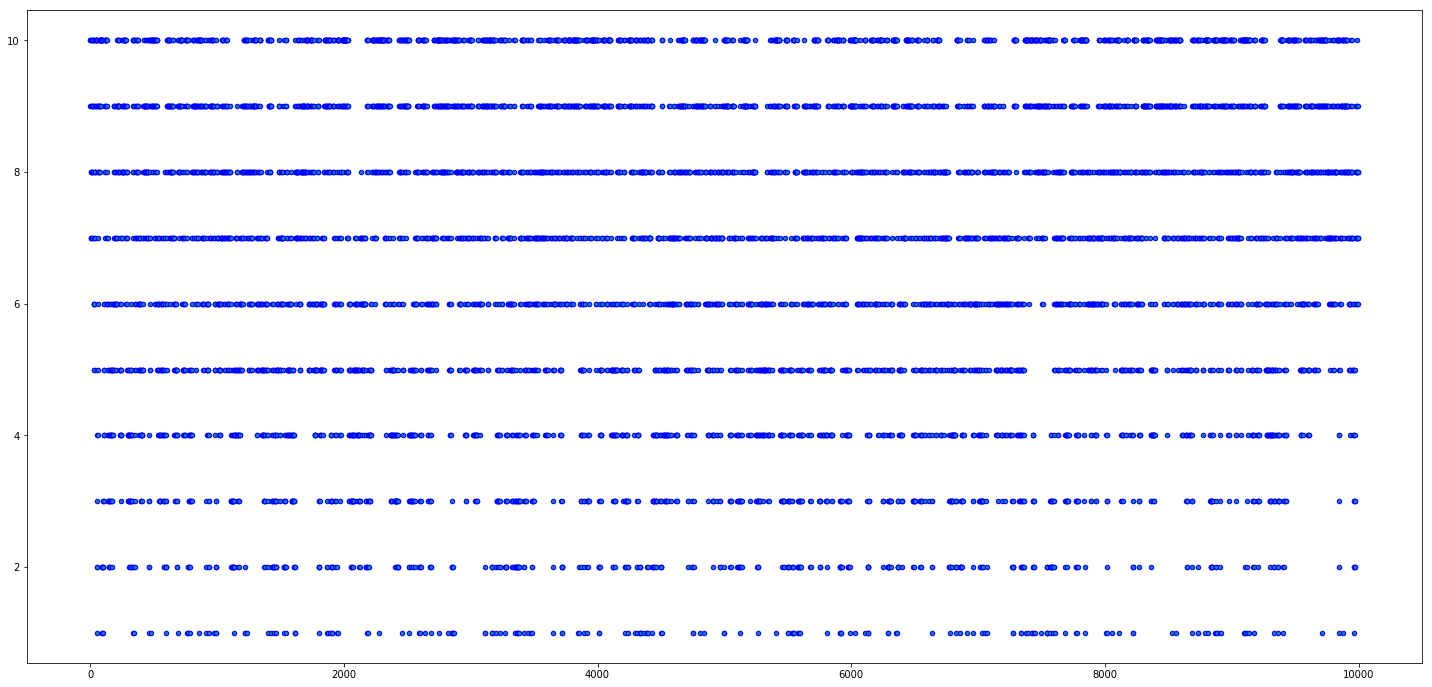

In [41]:
plt.figure(figsize = (25,12))
plt.scatter(list(range(numVisits)), 
         visitArray, s = 20, facecolors = None, edgecolors = 'b')
plt.show()

Or put another way, here's the staircase of probabilities:

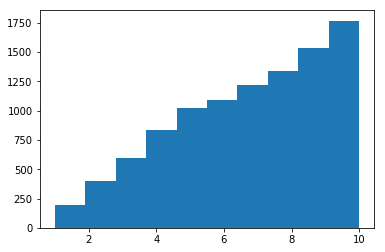

In [36]:
plt.hist(visitArray)
plt.show()